In [16]:
import numpy as np
import pandas as pd
from models.jump_cir import JumpCIR
from models.cir import CIR
from evaluators.monte_carlo import MonteCarlo

In [2]:
model_params = {
    "kappa_r": 0.5,
    "mu_r": 0.06,
    "sigma": 0.02,
    "mu": 0,
    "gamma": 0.01,
    "h": 10
}

In [3]:
cir = CIR(model_params)
jump_cir = JumpCIR(model_params)

In [4]:
mc_cir = MonteCarlo(cir)

In [5]:
mc_cir._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8617314593222543, 0.006954339506588618)

In [19]:
cir.exact(r0=0.04, T=3)

0.8616606594855633

In [6]:
mc_cir._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.8615469684879377, 0.00017546952077247078)

In [7]:
mc_jump_cir = MonteCarlo(jump_cir)

In [8]:
mc_jump_cir._simulate_paths(m=365, r0=0.04, n=1000, T=3)

(0.8615266737536333, 0.007115978165018076)

In [10]:
mc_jump_cir._simulate_paths_anti(m=365, r0=0.04, n=1000, T=3)

(0.8615180394542314, 0.0005251393549423127)

In [13]:
T = np.arange(1, 21)
prices_class = np.empty(len(T))
std_class = np.empty(len(T))
prices_anti = np.empty(len(T))
std_anti = np.empty(len(T))

In [14]:
for t in T:
    prices_class[t-1], std_class[t-1] = mc_jump_cir._simulate_paths(m=365, r0=0.04, n=1000, T=t)
    prices_anti[t-1], std_anti[t-1] = mc_jump_cir._simulate_paths_anti(m=365, r0=0.04, n=1000, T=t)

<AxesSubplot:xlabel='Year'>

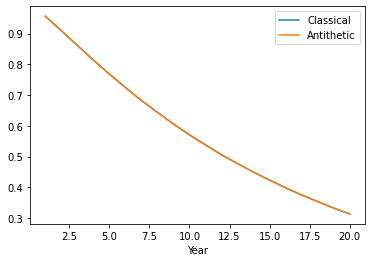

In [17]:
price_df = pd.concat([pd.Series(prices_class), pd.Series(prices_anti)], axis=1)
price_df.index = pd.Index(T, name="Year")
price_df.columns = ["Classical", "Antithetic"]
price_df.plot()

<AxesSubplot:xlabel='Year'>

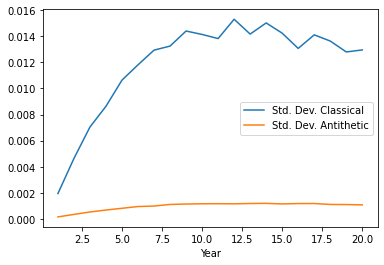

In [18]:
std_df = pd.concat([pd.Series(std_class), pd.Series(std_anti)], axis=1)
std_df.index = pd.Index(T, name="Year")
std_df.columns = ["Std. Dev. Classical", "Std. Dev. Antithetic"]
std_df.plot()